In [1]:
import pandas as pd 
import numpy as np 

In [2]:
#load the dataset

In [3]:
dataset=pd.read_csv("C://Users//patil//Desktop//IMDB Dataset.csv")

In [4]:
dataset['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [5]:
#step 2 vectorization 
#for transformation of document into features

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
count=CountVectorizer() #inititalize

In [7]:
docs=np.array(['the sun is shining',
              'the weather is sweet',
              'The sun is shining, the weather is sweet,and one and one is two '])

In [8]:
bag=count.fit_transform(docs)

In [9]:
bag

<3x9 sparse matrix of type '<class 'numpy.int64'>'
	with 17 stored elements in Compressed Sparse Row format>

In [10]:
print(count.vocabulary_)

{'the': 6, 'sun': 4, 'is': 1, 'shining': 3, 'weather': 8, 'sweet': 5, 'and': 0, 'one': 2, 'two': 7}


In [11]:
BagofWords=count.vocabulary_

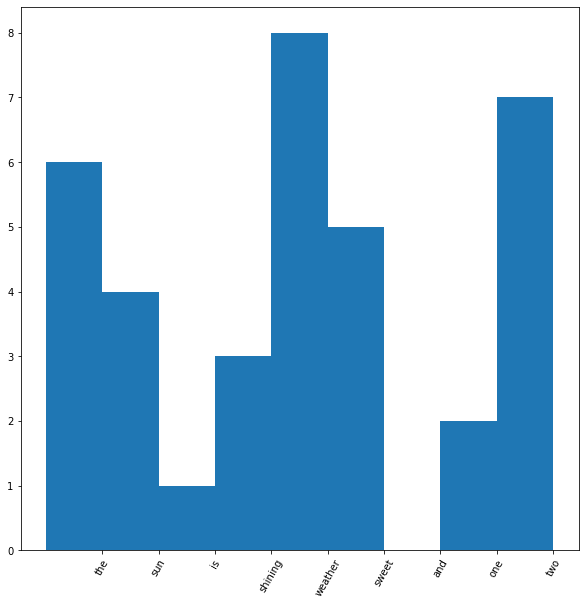

In [12]:
import numpy as np
import matplotlib.pyplot as plt


labels, values = zip(*BagofWords.items())

indexes = np.arange(len(labels))
width = 1
plt.figure(figsize=(10,10))
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels, rotation=60)
plt.show()

In [13]:
print(bag.toarray())

[[0 1 0 1 1 0 1 0 0]
 [0 1 0 0 0 1 1 0 1]
 [2 3 2 1 1 1 2 1 1]]


In [14]:
#term freq and inverse document

In [15]:
##Task 3 Term Frequency and Inverse Document Frequency
#Term frequencies alone do not contribute to distinct information
#tf-idf (t,d) = tf(t,d) X idf(t,d)
#idf(t,d) = log(nd / 1 + df(d,t))
#where nd = total number of documents and df(d,t) = number of documents 
#that contain the term t

In [16]:
from sklearn.feature_extraction.text import TfidfTransformer
tfid=TfidfTransformer(use_idf=True,norm='l2',smooth_idf=True)
print(tfid.fit_transform(count.fit_transform(docs)).toarray())

[[0.         0.43370786 0.         0.55847784 0.55847784 0.
  0.43370786 0.         0.        ]
 [0.         0.43370786 0.         0.         0.         0.55847784
  0.43370786 0.         0.55847784]
 [0.50238645 0.44507629 0.50238645 0.19103892 0.19103892 0.19103892
  0.29671753 0.25119322 0.19103892]]


In [17]:
np.set_printoptions(precision=2)
print(tfid.fit_transform(count.fit_transform(docs)).toarray())

[[0.   0.43 0.   0.56 0.56 0.   0.43 0.   0.  ]
 [0.   0.43 0.   0.   0.   0.56 0.43 0.   0.56]
 [0.5  0.45 0.5  0.19 0.19 0.19 0.3  0.25 0.19]]


In [18]:
#tockenization of documents
from nltk.stem.porter import PorterStemmer
porter=PorterStemmer()

In [19]:
def stemmer_token(text):
    return[porter.stem(word) for word in text.split()]
stemmer_token('coders like coding and thus they code')

['coder', 'like', 'code', 'and', 'thu', 'they', 'code']

In [20]:
#task 6 vectorising the dataset 

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(strip_accents=None,
                     lowercase=False,
                     tokenizer=stemmer_token,
                     use_idf=True,
                     norm='l2',
                     smooth_idf=True)

In [22]:
Y=dataset.sentiment.values
X=tfidf.fit_transform(dataset.review)

In [23]:
#task 7 use logistic regression 

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,random_state=1,test_size=0.5,shuffle=False)

In [26]:
import pickle 
from sklearn.linear_model import LogisticRegressionCV
clf=LogisticRegressionCV(cv=5,
                        scoring='accuracy',
                        random_state=0,
                        n_jobs=-3,
                        verbose=3,
                        max_iter=300).fit(X_train,Y_train)
saved_model=open('saved_model.sav','wb')
pickle.dump(clf,saved_model)
saved_model.close()

[Parallel(n_jobs=-3)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-3)]: Done   2 out of   5 | elapsed:  4.4min remaining:  6.5min
[Parallel(n_jobs=-3)]: Done   5 out of   5 | elapsed:  4.6min finished


In [27]:
#model evaluation
filename='saved_model.sav'
saved_clf=pickle.load(open(filename,'rb'))

saved_clf.score(X_test,Y_test)

0.8898